# PyTorch - Vortrag
### HTW Berlin - Angewandte Informatik
### Modul "Ausgewählte Kapitel sozialer Webtechnologien" (aka Neuronale Netze)

#### Diletta Calussi - s0559842

# Inhalte

1. Das Framework PyTorch
2. PyTorch Fundamentals: Tensors und Gradienten
3. Netze in PyTorch definieren: Das Modul `torch.nn`
4. MNIST-Classifier in PyTorch
5. CNN in PyTorch am Beispiel von XX
6. Quellen

## 1. Das Framework PyTorch

- Eine ML Open-Source-Bibliothek für python
- Basiert auf der in **Lua** geschriebenen Bibliothek **Torch**
- Vom Facebook-Forschungsteam für K.I. entwickelt 
- Erscheinungsjahr: 2016
- Unterstützt GPU sowie CPU 
- High Level 


### Funktionen
* Autograd-System zur Berechnung der Ableitungen bezuüglich einer trainierbaren Variablen
* Dynamische Graph-Berechnung 
    - Anzahl von Neuronen kann sich zur Laufzeit verändern
    - If und else-Verzweigungen nach Zweck einstellbar
* NumPy Bridge

Eine Anleitung für die Installation ist auf der Webseite von [PyTorch](https://pytorch.org/) verfügbar.


In [7]:
#Installation check
import torch
print("Torch version:", torch.__version__)
print("CUDA is active:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 0.4.0
CUDA is active: True
CUDA version: 8.0


## 2. PyTorch Fundamentals

### 2.1 Tensoren

Ein `torch.Tensor` ist eine mehrdimensionale Matrix, die Elemente von einem bestimmten Datentyp enthält. Ein detaillierter Überblick der unterstützten Datentype ist auf der [Webseite von PyTorch](https://pytorch.org/docs/stable/tensors.html) verfügbar.  

PyTorch unterstützt sowohl GPU- als auch CPU-Tensoren. Tensoren verfügen über folgende Attribute:
- `dtype`, leifert Datentyp
- `device`, das Gerät (CPU oder GPU), wo das Tensorobjekt gespeichert ist oder wird
- `layout`, Speicherlayout von einem Tensor


In [1]:
import torch

In [3]:
#Tensor erzeugen
x = torch.randn(5,3)
x

tensor([[ 1.1114, -0.7801,  1.0160],
        [ 0.7871,  1.0868, -0.0281],
        [ 0.3378,  1.0709,  1.1754],
        [-1.5334, -1.1289,  0.1204],
        [ 0.1722,  0.0489,  0.9199]])

In [4]:
x = torch.randn(5,3,2)
x

tensor([[[ 1.1003, -1.0636],
         [-1.4326, -0.1731],
         [-0.1325,  1.3072]],

        [[-0.0246, -1.0492],
         [-0.5402,  1.7467],
         [-0.4262,  0.0971]],

        [[-0.4189,  3.9772],
         [ 0.2635,  2.3321],
         [-1.6450, -0.1602]],

        [[-0.3269,  0.8263],
         [ 0.7079, -1.6444],
         [ 0.4836, -0.1163]],

        [[ 0.4128,  1.2000],
         [ 0.0486,  1.0876],
         [ 1.1299,  0.0518]]])

In [5]:
a = torch.randint(1,10,(2,3))
b = torch.randint(1,10,(2,3))

In [6]:
#Elementwise Operationen
print("Elementwise-Operationen:")
print("Addition: ", torch.add(a,b), "\noder:", a+b)
print("*"*60)
print("Subtraktion: ", torch.sub(a,b), "\noder:", a-b)
print("*"*60)
print("Multiplikation: ", torch.mul(a,b), "\noder:", a*b)
print("*"*60)
print("Division: ", torch.div(a,b), "\noder:", a/b)

Elementwise-Operationen:
Addition:  tensor([[  4.,  11.,   9.],
        [  9.,  15.,  13.]]) 
oder: tensor([[  4.,  11.,   9.],
        [  9.,  15.,  13.]])
************************************************************
Subtraktion:  tensor([[ 2., -1.,  3.],
        [ 5., -3., -1.]]) 
oder: tensor([[ 2., -1.,  3.],
        [ 5., -3., -1.]])
************************************************************
Multiplikation:  tensor([[  3.,  30.,  18.],
        [ 14.,  54.,  42.]]) 
oder: tensor([[  3.,  30.,  18.],
        [ 14.,  54.,  42.]])
************************************************************
Division:  tensor([[ 3.0000,  0.8333,  2.0000],
        [ 3.5000,  0.6667,  0.8571]]) 
oder: tensor([[ 3.0000,  0.8333,  2.0000],
        [ 3.5000,  0.6667,  0.8571]])


Für eine Matrizenmultiplikation muss der Tensor resized werden.
Dafür sind in PyTorch die Funktionen:
- [`reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), 
- [`resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_) und 
- [`view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view)


In [15]:
print(a.shape)
print(b.shape)

#Reshaping mit reshape
resh_b = b.reshape(3,2)
print(resh_b.shape)
torch.mm(a,resh_b)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([3, 2])


tensor([[ 72.,  70.],
        [ 79.,  96.]])

In [14]:
#Reshaping mit resize
res_b = b.resize(3,2)
print(res_b.shape)
torch.mm(a,res_b)

torch.Size([3, 2])


tensor([[ 72.,  70.],
        [ 79.,  96.]])

In [16]:
#Reshaping mit view
b_view = b.view(3,2)
torch.mm(a,b_view)

tensor([[ 72.,  70.],
        [ 79.,  96.]])

### 2.2 NumPy Bridge

In [17]:
import numpy as np
import torch

In [18]:
x = np.zeros((2,3))
y = torch.zeros(2,3)

print(type(x), x.dtype)
print(type(y), y.dtype)

<class 'numpy.ndarray'> float64
<class 'torch.Tensor'> torch.float32


In [19]:
#Automatisches Casting numpy zu torch
z = x + y
print(type(z), z.dtype)

<class 'torch.Tensor'> torch.float64


In [23]:
print("Vor Umwandlung: \n", z)
#Umwandlung zu numpy
#Die zwei Objekte teilen den Speicherraum!

#Umwandlung nach numpy
xx = z.numpy()
#Veräderung des Wertes von z (!)
xx += 1.0

print("Nach Umwandlung:\n", z)

Vor Umwandlung: 
 tensor([[ 3.,  3.,  3.],
        [ 3.,  3.,  3.]], dtype=torch.float64)
Nach Umwandlung:
 tensor([[ 4.,  4.,  4.],
        [ 4.,  4.,  4.]], dtype=torch.float64)


In [28]:
#axis vs dim

x = np.random.randint(1, 10,(2,3))
print(x)
x.mean(axis=1)

[[4 8 4]
 [4 3 9]]


array([5.33333333, 5.33333333])

In [27]:
y = torch.randint(1,10,(2,3))
print(y)
y.mean(dim=1)

tensor([[ 6.,  7.,  4.],
        [ 3.,  9.,  6.]])


tensor([ 5.6667,  6.0000])

### 2.3 Autograd: Gradienten in PyTorch

Das Package `torch.autograd` bietet die Möglichkeit zur automatischen Berechnung der Ableitung bezüglich einer Variablen, die zu einem Computation Graphen gehört.

Um die Funktionalität zu nutzen, muss das Flag `requires_grad` bei Tensordeklaration auf `True` gesetzt werden.

Beispiel aus der Übung:

In [29]:
# External Modules
from graphviz import Digraph
import numpy as np
import hashlib

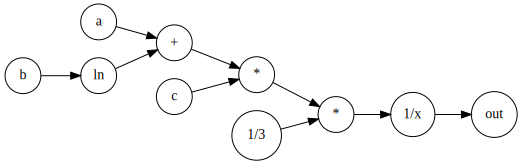

In [30]:
# creating empty graph ad set some attributes
f = Digraph('computational_graph', filename='graph_clean.gv')
f.attr(rankdir='LR')
f.attr('node', shape='circle')

# create the graph
f.node('a')
f.node('b')
f.node('c')
f.edge('a', '+', label='')
f.edge('b', 'ln', label=' ')
f.edge('ln', '+', label=' ')
f.edge('+','* ', label=' ')
f.edge('c','* ')
f.edge('* ', '*')
f.edge('1/3 ', '*')
f.edge('*','1/x')
f.edge('1/x','out')

f

Im Graphen sind 3 Variablen:
- a (2)
- b (e)
- c (3)
Setzt man das Flag von diesen Variablen auf True, dann werden all die Operationen, die diese Variablen betreffen, vom Framework automatisch registriert. 

Am Ende eines Forward-Schrittes ist es möglich, die Funktion `backward()` aus `torch.autograd` aufzurufen, die den Backward-Pass brechnet. 
Über das Attribut `grad` kann man den Wert der Ableitung dann schnell lesen. Das Attribut `grad_fn` zeigt die auf der Variablen angewandte Operationsart (Logarithmus, Summe, Multiplikation, usw.)

In [54]:
#Variablen deklaration
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(np.e, requires_grad=True)
c = torch.tensor(3., requires_grad=True)
dummy = torch.tensor(1)
print(a, b, c)

tensor(2.) tensor(2.7183) tensor(3.)


In [56]:
print(a.grad, b.grad, c.grad, d.grad)
print(a.requires_grad, b.requires_grad, c.requires_grad, d.requires_grad)

None None None None
True True True False


In [49]:
def applyExerciseFunction(a,b,c):
    ln = torch.log(b)
    print(ln.grad_fn)
    x = a + ln 
    print(x.grad_fn)
    x = c * x
    print(x.grad_fn)
    x = (1./3.)*x
    print(x.grad_fn)
    out = 1./x
    print(out.grad_fn)
    return out

In [57]:
out =  applyExerciseFunction(a,b,c) #1/3
print("Ergebnis aus Fowardpass: ", out) #1./3.

Ergebnis aus Fowardpass:  tensor(0.3333)


In [58]:
out.backward(retain_graph=True)#retain_graph bei großen Berechnungen nicht verwenden

In [59]:
print("dout/da: ", a.grad)
print("dout/db: ", b.grad)
print("dout/dc: ", c.grad)

dout/da:  tensor(-0.1111)
dout/db:  tensor(1.00000e-02 *
       -4.0875)
dout/dc:  tensor(-0.1111)


In [65]:
z = dummy + 2
print(z.grad_fn)
print(dummy.grad)

#Aktivierung des Autograd für dummy
dummy.r


None
None
